In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings=pd.read_csv('ratings.csv')
r=ratings
r.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies['genres'] = movies['genres'].str.split('|')
movies['year']=movies['title'].str[-5:-1]
movies=movies[(movies['title'].str[-1]==')')&(movies['title'].str[-6]=='(')] #drop the movies without year in title
movies.year=pd.to_numeric(movies.year)
movies['Decade']=movies['year']//10 *10
movies.head()

,movieId,title,genres,year,Decade
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1990
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,1990
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,1990
4,5,Father of the Bride Part II (1995),[Comedy],1995,1990


In [5]:
27278-27049 #Total number of movies without year in title, we can ignore 229 out of 27278

229

In [6]:
movies=movies.set_index('movieId')
movies.sort_values('year').head() #The five earliest movies 

,title,genres,year,Decade
movieId,,,,
129851,Dickson Greeting (1891),[(no genres listed)],1891,1890
95541,Blacksmith Scene (1893),[(no genres listed)],1893,1890
94951,Dickson Experimental Sound Film (1894),[Musical],1894,1890
88674,Edison Kinetoscopic Record of a Sneeze (1894),[Documentary],1894,1890
120869,Employees Leaving the Lumière Factory (1895),[Documentary],1895,1890


In [7]:
#Seperating each Genre
sep = movies.reset_index().set_index(['movieId','title','year'])['genres'].apply(pd.Series).stack()
sep = sep.reset_index()
sep.columns=['movieId','title','year','level','genres']
sep.to_csv('sep.csv')
sep.head()

,movieId,title,year,level,genres
0,1,Toy Story (1995),1995,0,Adventure
1,1,Toy Story (1995),1995,1,Animation
2,1,Toy Story (1995),1995,2,Children
3,1,Toy Story (1995),1995,3,Comedy
4,1,Toy Story (1995),1995,4,Fantasy


In [8]:
print(sep.genres.nunique())
sep.genres.unique()
#20 types of genres

20


array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

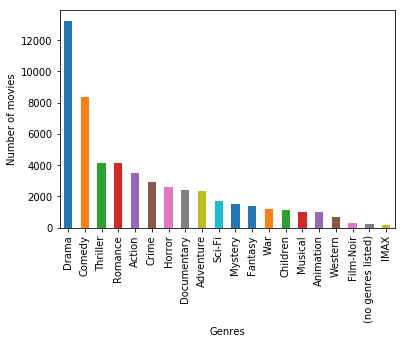

In [9]:
sep['genres'].value_counts().plot(kind='bar') #Most movies are Drama
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.show()

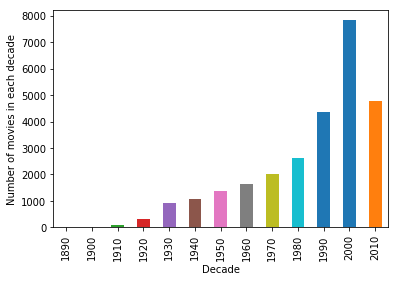

In [10]:
movies['Decade'].value_counts().sort_index().plot(kind='bar') #Value counts of movies in each decade
plt.xlabel('Decade')
plt.ylabel('Number of movies in each decade')
plt.show()

In [11]:
sep[sep['genres']=='Drama']['year'].value_counts().head(3) #3 years with most Drama Genre

2009    505
2007    473
2008    462
Name: year, dtype: int64

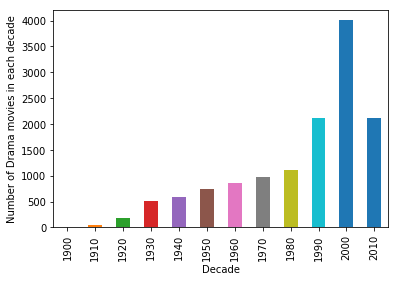

In [12]:
sep['Decade']=sep['year']//10 *10
sep[sep['genres']=='Drama']['Decade'].value_counts().sort_index().plot(kind='bar')#Value counts of Drama movies in each decade
plt.xlabel('Decade')
plt.ylabel('Number of Drama movies in each decade')
plt.show()

In [13]:
sum(movies['title'].value_counts()>1) #movies with same title including the year

16

In [14]:
movies['title'].value_counts().head(16) #These movies repeat twice including the year

Aladdin (1992)                         2
Emma (1996)                            2
Casanova (2005)                        2
Paradise (2013)                        2
Chaos (2005)                           2
Blackout (2007)                        2
Offside (2006)                         2
Clear History (2013)                   2
20,000 Leagues Under the Sea (1997)    2
Hamlet (2000)                          2
Girl, The (2012)                       2
War of the Worlds (2005)               2
Beneath (2013)                         2
Men with Guns (1997)                   2
Darling (2007)                         2
Johnny Express (2014)                  2
Name: title, dtype: int64

In [15]:
movies['Name']=movies['title'].str[:-7] #removing the year from title

In [16]:
movies['Name'].value_counts().head(20) #These movie titles repeat several times excluding the year in the title 

Misérables, Les                   9
Hamlet                            8
Three Musketeers, The             7
Alice in Wonderland               6
Christmas Carol, A                6
Wuthering Heights                 6
Jane Eyre                         5
Cinderella                        5
Oliver Twist                      4
Paradise                          4
Blackout                          4
Dangerous Liaisons                4
Eden                              4
Hound of the Baskervilles, The    4
Angel                             4
Cargo                             4
Dr. Jekyll and Mr. Hyde           4
Maniac                            4
King Solomon's Mines              4
Emma                              4
Name: Name, dtype: int64

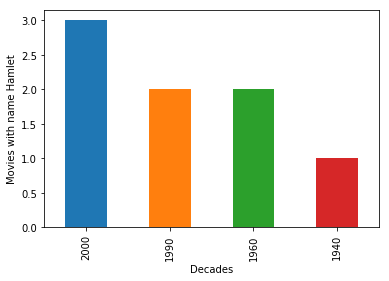

In [17]:
movies[movies.Name=='Hamlet'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Hamlet')
plt.show()

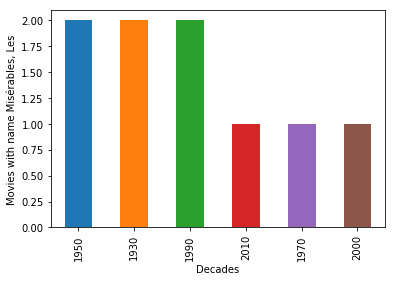

In [18]:
movies[movies.Name=='Misérables, Les'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Misérables, Les')
plt.show()

In [19]:
movies[movies.Name=='Misérables, Les'].sort_values(by='Decade').Decade.value_counts()

1950    2
1930    2
1990    2
2010    1
1970    1
2000    1
Name: Decade, dtype: int64

In [20]:
r.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [21]:
#sort_values(by='movieId')
movies.loc[r[r.rating==5].movieId.value_counts().head(10).index,'title'] #Ten movies with most rating=5

318              Shawshank Redemption, The (1994)
296                           Pulp Fiction (1994)
593              Silence of the Lambs, The (1991)
527                       Schindler's List (1993)
260     Star Wars: Episode IV - A New Hope (1977)
356                           Forrest Gump (1994)
858                         Godfather, The (1972)
50                     Usual Suspects, The (1995)
2571                           Matrix, The (1999)
110                             Braveheart (1995)
Name: title, dtype: object

In [22]:
#sort_values(by='movieId')
movies.loc[r[r.rating==4.5].movieId.value_counts().head(10).index,'title'] #Ten movies with most rating=4.5

318                      Shawshank Redemption, The (1994)
2571                                   Matrix, The (1999)
296                                   Pulp Fiction (1994)
2959                                    Fight Club (1999)
4993    Lord of the Rings: The Fellowship of the Ring,...
5952        Lord of the Rings: The Two Towers, The (2002)
7153    Lord of the Rings: The Return of the King, The...
50                             Usual Suspects, The (1995)
593                      Silence of the Lambs, The (1991)
356                                   Forrest Gump (1994)
Name: title, dtype: object

In [23]:
#sort_values(by='movieId')
movies.loc[r[r.rating==4].movieId.value_counts().head(10).index,'title'] #Ten movies with most rating=4 

593             Silence of the Lambs, The (1991)
457                         Fugitive, The (1993)
356                          Forrest Gump (1994)
480                         Jurassic Park (1993)
589            Terminator 2: Judgment Day (1991)
150                             Apollo 13 (1995)
1                               Toy Story (1995)
296                          Pulp Fiction (1994)
32     Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
110                            Braveheart (1995)
Name: title, dtype: object

In [24]:
movies.loc[r[r.rating==3].movieId.value_counts().head(10).index,'title']#Ten movies with most rating=3 

592                           Batman (1989)
480                    Jurassic Park (1993)
153                   Batman Forever (1995)
380                        True Lies (1994)
780    Independence Day (a.k.a. ID4) (1996)
648              Mission: Impossible (1996)
344       Ace Ventura: Pet Detective (1994)
367                        Mask, The (1994)
316                         Stargate (1994)
377                            Speed (1994)
Name: title, dtype: object

In [25]:
movies.loc[r[r.rating==0.5].movieId.value_counts().head(10).index,'title']#Ten movies with most rating=.5 

2710                     Blair Witch Project, The (1999)
19                 Ace Ventura: When Nature Calls (1995)
231               Dumb & Dumber (Dumb and Dumber) (1994)
2628    Star Wars: Episode I - The Phantom Menace (1999)
3593                            Battlefield Earth (2000)
344                    Ace Ventura: Pet Detective (1994)
1721                                      Titanic (1997)
1917                                   Armageddon (1998)
1562                               Batman & Robin (1997)
780                 Independence Day (a.k.a. ID4) (1996)
Name: title, dtype: object

In [26]:
movies.loc[r[r.rating==0.5].movieId.value_counts().tail(10).index,'title']#Ten movies with least number of rating and rating=.5 

88118                      Perfect Host, The (2010)
106873    Evangelion: 3.0 You Can (Not) Redo (2012)
8649                          Gray Lady Down (1978)
40969                          First Descent (2005)
110505                                Sparks (2013)
8095                           Cucaracha, La (1998)
2636                      Mummy's Ghost, The (1944)
32659                                 Tanguy (2001)
43608                    Panic in Year Zero! (1962)
71069               Green Street Hooligans 2 (2009)
Name: title, dtype: object

In [27]:
r[r.movieId==318].rating.mean()  #Average rating for the 'Shawshank Redemption, The'

4.446990499637029

In [28]:
r[r.movieId==296].rating.mean() #Average rating for 'Pulp Fiction' 

4.174231169217055

In [29]:
MaxRating=r['movieId'].value_counts().head(10)

In [30]:
movies.loc[MaxRating.index,'title'] #The movies with the max number of rating

296                           Pulp Fiction (1994)
356                           Forrest Gump (1994)
318              Shawshank Redemption, The (1994)
593              Silence of the Lambs, The (1991)
480                          Jurassic Park (1993)
260     Star Wars: Episode IV - A New Hope (1977)
110                             Braveheart (1995)
589             Terminator 2: Judgment Day (1991)
2571                           Matrix, The (1999)
527                       Schindler's List (1993)
Name: title, dtype: object

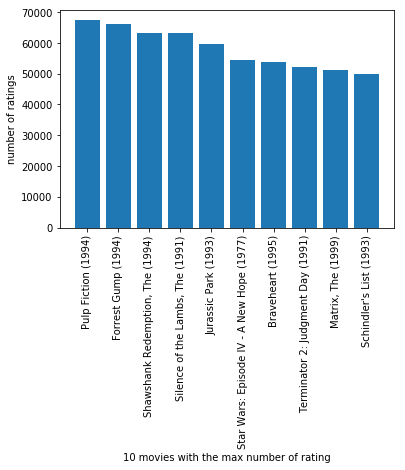

In [31]:
plt.bar(range(len(MaxRating)), MaxRating)
plt.xticks(range(len(MaxRating)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('10 movies with the max number of rating')
plt.ylabel('number of ratings')
plt.show()

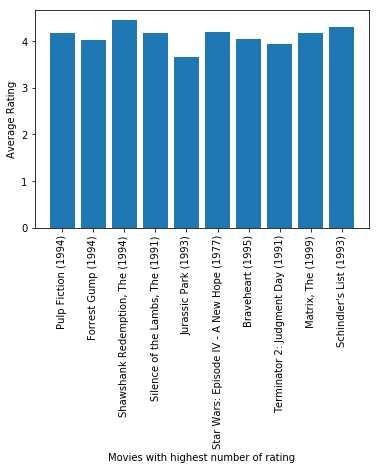

In [32]:
List5=[]
for i in MaxRating.index:
    List5.append(r[r.movieId==i].rating.mean())
plt.bar(range(len(List5)), List5)
plt.xticks(range(len(List5)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('Movies with highest number of rating')
plt.ylabel('Average Rating')
plt.show()

In [33]:
MinRating=r['movieId'].value_counts()
MinRating=MinRating[MinRating==1]
movies.loc[MinRating.index,'title'].shape #3972 movies just rated once

C:\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


(3972,)

In [34]:
r=ratings
r1= r.merge(sep.reset_index(), left_on='movieId', right_on='movieId', how='inner')
del r1[['timestamp','index','level']]
r1.head() #merge sep and rating

TypeError: '['timestamp', 'index', 'level']' is an invalid key

In [ ]:
sns.boxplot(x='Decade', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=60)
plt.show()#movies of 40th decade has the highest rating

In [ ]:
sns.boxplot(x='genres', y='Decade', data=sep,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [ ]:
ID=r1.userId.value_counts().head(10) #UserID wih highest number of rating
ID

In [ ]:
List5=[]
for i in ID.index:
    List5.append(r1[r1.userId==i]['rating'].mean())

List5#Average rating of the ppl with highest number of rating

In [ ]:
sns.boxplot(x='genres', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=90)
plt.show()#[Drama, Mystery,Crime, War,Imax, documentary] has the highest ratings
#[Horror] is the least favorit

In [ ]:
sns.heatmap(r1[['userId','movieId','rating','year']].corr(),cmap='coolwarm')
plt.show()

In [ ]:
sep.genres.nunique()

In [ ]:
df2 = pd.DataFrame({'genres': sep.genres.unique(), 'genres_num':range(len(sep.genres.unique()))})# create a temporary dataframe 
data = sep.merge(df2, on='genres', how='left')# Now merge it by assigning different values to different strings.
data=data[['movieId','year','genres_num']]

In [ ]:
sns.heatmap(data.corr(),cmap='Blues')
plt.show()

In [ ]:
r1=r1[['userId','movieId','rating','genres']]
data_new = r1.merge(df2, on='genres', how='left')
sns.heatmap(data_new.corr(),cmap='Blues')
plt.show()